## Loading packages & dataset

In [1]:
from datetime import datetime
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy
import statsmodels
import patsy
import kaggleaux as ka
import pandas as pd
import zipfile

C:\Users\linghao\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [27]:
z = zipfile.ZipFile('train.csv.zip')
trainDF = pd.read_csv(z.open('train.csv'))

## Scaling X, Y axes

In [3]:
from sklearn import preprocessing
xy_scaler = preprocessing.StandardScaler()
xy_scaler.fit(trainDF[['X', 'Y']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
trainDF[['X', 'Y']] = xy_scaler.transform(trainDF[['X', 'Y']])

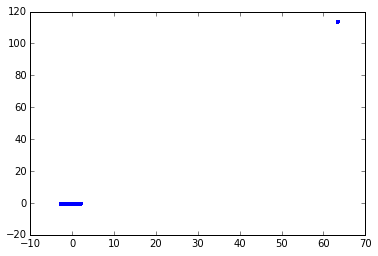

In [5]:
plt.plot(trainDF['X'], trainDF['Y'], '.')
plt.show()

We can see that there are some erroneous y values. Drop them.

In [5]:
trainDF = trainDF[abs(trainDF['Y'])<100]

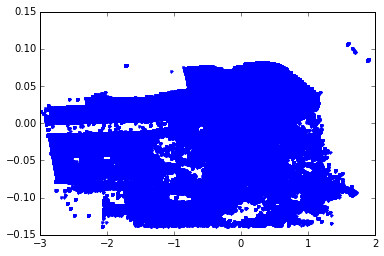

In [7]:
plt.plot(trainDF['X'], trainDF['Y'], '.')
plt.show()

In [42]:
groups = trainDF.groupby('Category')

## Visualizations for analysis

## Extract featrues

In [22]:
def parse_data(df, drop_list):
    feature_list = df.columns.tolist()
    for feature in drop_list:
        feature_list.remove(feature)
    ndf = df[feature_list]
    features = ndf
    labels = df['Category'].astype('category')
    return features, labels

In [17]:
def make_features(df):
    PdDistrict_dummies = pd.get_dummies(df['PdDistrict'], prefix='PdDistrict')
    df.drop(['PdDistrict'], axis=1, inplace=True)
    df = df.join(PdDistrict_dummies)
    DayOfWeek_dummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek')
    df.drop(['DayOfWeek'], axis=1, inplace=True)
    df = df.join(DayOfWeek_dummies)
    return df

In [32]:
features, labels = parse_data(trainDF, ['Category', 'Resolution', 'Descript', 'Address', 'Dates'])
trainX = make_features(features)

c:\python27\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [17]:
per = range(len(trainDF))

In [18]:
np.random.shuffle(per)

In [28]:
trainDF = trainDF[['DayOfWeek']]

In [16]:
per

In [30]:
trainDF = trainDF.iloc[per,:]

In [31]:
trainDF.head(3)

,DayOfWeek
262468,Saturday
217465,Sunday
223264,Friday


In [32]:
DayOfWeek_dummies = pd.get_dummies(trainDF['DayOfWeek'], prefix='DayOfWeek')
trainDF.drop(['DayOfWeek'], axis=1, inplace=True)
trainDF = trainDF.join(DayOfWeek_dummies)

In [34]:
trainDF.columns.tolist()

['DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday']

In [33]:
trainDF.head(3)

,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
262468,0,0,1,0,0,0,0
217465,0,0,0,1,0,0,0
223264,1,0,0,0,0,0,0


In [33]:
trainX.columns.tolist()

['X',
 'Y',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday']

In [29]:
trainY = labels

## Multinomial Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression(solver='lbfgs', multi_class='ovr')

In [34]:
model.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [39]:
model.predict(trainX[:1000])

array(['LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT',
       'LARCENY/THEFT', 'OTHER OFFENSES', 'OTHER OFFENSES',
       'OTHER OFFENSES', 'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT',
       'LARCENY/THEFT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'OTHER OFFENSES',
       'OTHER OFFENSES', 'DRUG/NARCOTIC', 'OTHER OFFENSES',
       'OTHER OFFENSES', 'DRUG/NARCOTIC', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'DRUG/NARCOTIC', 'DRUG/NARCOTIC', 'LARCENY/THEFT',
       'DRUG/NARCOTIC', 'LARCENY/THEFT', 'OTHER OFFENSES', 'LARCENY/THEFT',
       'LARCENY/THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES', 'LARCENY/THEFT',
       'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT',
       'LARCENY/THEFT', 'OTHER OFFENSES', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'OTHER OFFENSES',
       'OTHER OFFENSES', 'LARCENY/THEFT', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES',
       'OTHER OFFEN

In [40]:
del model

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier